# M2608.001300 Machine Learning <br> Assignment #2-1 Linear regression

Copyright (C) Data Science and Artificial Intelligence Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. Written by Heonseok Ha, March 2018

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
<font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.  
Once you have done **all parts**, run the *CollectSubmission.sh* script with your **student_id** as input argument. <br>
This will produce a zipped file called *[student_id].zip*. Please submit this file on ETL. &nbsp;&nbsp; (Usage: ./*CollectSubmission.sh* &nbsp; student_id)

## Load dataset
You can find this dataset on  **3.linear_class_regress.pdf** slide **51** <br>

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error

data = np.loadtxt('data.csv', delimiter=',')
print('data: ' + str(data.shape))
#print(data)

X = np.expand_dims(data[:,0], axis=1)
print('X: ' + str(X.shape))
#print(X)

y = np.expand_dims(data[:,1], axis=1)
print('y: '+ str(y.shape))
#print(y)

data: (20, 2)
X: (20, 1)
y: (20, 1)


## Linear regression with sklearn
Use **linear_model** from sklearn

SK Parameters:  [74.28331424] [14.94747973]
SK MSE:  1.0624908437610157


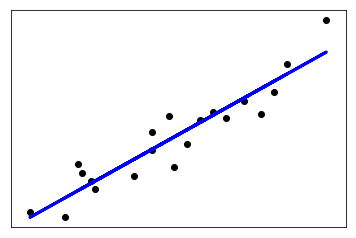

In [4]:
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

sk_lin_regr = linear_model.LinearRegression()

sk_lin_regr.fit(X, y)
print('SK Parameters: ', sk_lin_regr.intercept_, np.squeeze(sk_lin_regr.coef_, axis=0))

y_pred = sk_lin_regr.predict(X)
#print(y_pred)
print('SK MSE: ', mean_squared_error(y, y_pred) )

# Plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

---
### <font color=blue>[Problem #1]</font> (30 points)

## 1-1. Linear regression without sklearn
1) Complete the following class definition.  
2) You can write your code only within the marked with comments.

You can use **inv** from numpy.linalg

In [15]:
from numpy.linalg import inv

class Linear_regression():
    
    def fit(self, X, y):
        """
        ↑↑↑
        self.params = ...
        ↓↓↓
        """
        
        pseudo_inv = np.matmul(inv(np.matmul(X.T, X)), X.T)
        self.params = np.matmul(pseudo_inv, y)

    def predict(self, X):
        return  X @ self.params
    
    def get_weight(self):
        return np.squeeze(self.params[1:], axis=1)

    def get_bias(self):
        return self.params[0]

## Linear regression without sklearn
Extend X like **3.linear_class_regress.pdf** slide **52**


In [16]:
"""
↑↑↑
X_extended = ...
↓↓↓
"""
N = X.shape[0]
X_extended = np.c_[ np.ones(N), X ]
print('X_extneded: ', str(X_extended.shape))

my_lin_regr = Linear_regression()

my_lin_regr.fit(X_extended, y)
print('My Parameters: ', my_lin_regr.get_bias(), my_lin_regr.get_weight())

y_pred = my_lin_regr.predict(X_extended)
print('My MSE: ', mean_squared_error(y, y_pred) )

X_extneded:  (20, 2)
My Parameters:  [74.28331424] [14.94747973]
My MSE:  1.0624908437610197


#### <font color=blue>[Problem #1-1]</font> (10+10 points)  
1) (10pt) Implementing **fit** of Linear_regression class <br>
2) (10pt) Extending **X**

## 1-2. Linear regression on synthetic dataset
**Given information** <br>
N : number of data <br>
W : parameters [bias, weights] <br>

** Generate a synthetic dataset using N and W** <br>
X : [N, len(W)-1] <br>
y : You should add **noise** from normal distribution (0,1) <br>

In [28]:
N = 100

W = [35, -5.9, 2.1]

"""
↑↑↑
X = ...
X_extneded = 

y = 
↓↓↓
"""
X = []
X_extended = []
y = []

for i in range(N):
    
    # inputs on integer grid [0,10]*[0,10]
    x_ = i%10
    y_ = i/10
    
    # f without error
    f = np.dot([1, x_, y_], W)
    
    #add normal dist. error
    f = f+np.random.normal(loc=0.0, scale=1.0)
    
    X.append([x_, y_])
    X_extended.append([1, x_, y_])
    y.append([f])

X = np.array(X)
X_extended = np.array(X_extended)
y = np.array(y)
    
print()

print('X: ' + str(X.shape))
print('X_extended: ' + str(X_extended.shape))
print('y: '+ str(y.shape))


X: (100, 2)
X_extended: (100, 3)
y: (100, 1)


## Test synthetic dataset
**X** for sk_lin_regr <br>
**X_extended** for my_lin_regr

In [29]:
sk_lin_regr = linear_model.LinearRegression()
sk_lin_regr.fit(X, y)

my_lin_regr = Linear_regression()
my_lin_regr.fit(X_extended, y)

print('SK Parameters: ', sk_lin_regr.intercept_, np.squeeze(sk_lin_regr.coef_, axis=0))
print('My Parameters: ', my_lin_regr.get_bias(), my_lin_regr.get_weight())

sk_y_pred = sk_lin_regr.predict(X)
my_y_pred = my_lin_regr.predict(X_extended)

print('SK_MSE: ', mean_squared_error(y, sk_y_pred))
print('My_MSE: ', mean_squared_error(y, my_y_pred))

SK Parameters:  [34.5278612] [-5.82723635  2.09513846]
My Parameters:  [34.5278612] [-5.82723635  2.09513846]
SK_MSE:  0.9267536103922643
My_MSE:  0.9267536103922659


#### <font color=blue>[Problem #1-2]</font> (10 points)  
1) (10pt) Data generation <br>
